<a href="https://colab.research.google.com/github/ByeongKeun/Industrial-AI/blob/master/2021.1%ED%95%99%EA%B8%B0/%EC%82%B0%EC%97%85%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0/%EC%8B%A4%EC%8A%B5/2021_04_15_%EC%82%B0%EC%97%85%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0_%EC%88%98%EC%97%85%EB%82%B4%EC%9A%A9_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz  

data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
def performance_metric(y_true, y_predict):
    #mse
    error = metrics.mean_squared_error(y_true, y_predict)
    return error

def fit_model(data, target):
    regressor = DecisionTreeRegressor()
    param_grid = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    scoring_fnc = metrics.make_scorer(performance_metric, False)
    reg = GridSearchCV(regressor, param_grid, scoring = scoring_fnc, cv = 3)
    reg.fit(data, target)
    return reg.best_estimator_

boston = load_boston()
medv = boston.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

regression = fit_model(X_train, y_train)
#CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT

client = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]
pred_house_price = regression.predict(client)[0]
print("Predicted value of client's home: {0:.2f}".format(pred_house_price), "(No Feature Selection)")

Predicted value of client's home: 20.73 (No Feature Selection)


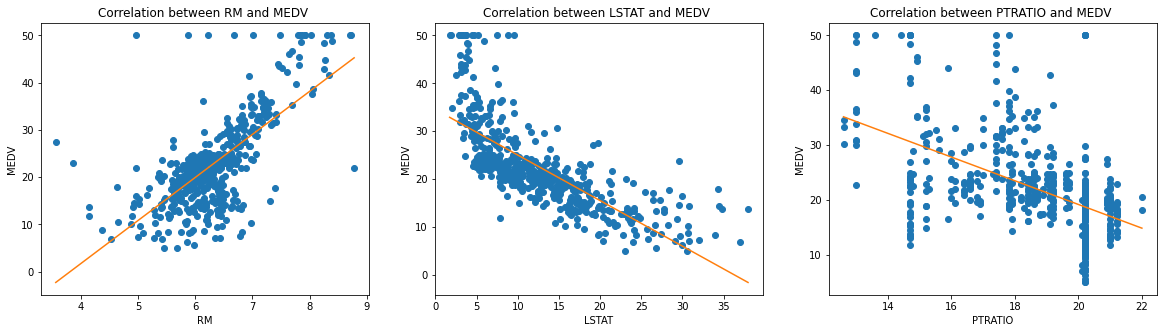

In [ ]:
plt.figure(figsize=(20, 5))
medv = data.target
data = df[['RM', 'LSTAT', 'PTRATIO']]
# i: index

for i, col in enumerate(data.columns):
    # 3 plots here hence 1, 3
    plt.subplot(1, 3, i+1)
    x = data[col]
    y = medv
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title('Correlation between '+ col + ' and MEDV ')
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
export_graphviz(regression_f, out_file ='tree.dot') 
with open("tree.dot") as f:
    dot_graph = f.read()

# remove the display(...)
pydot_graph = pydotplus.graph_from_dot_file("tree.dot")
Image(pydot_graph.create_png())

NameError: ignored